In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
import cifar10_VGG

Using TensorFlow backend.


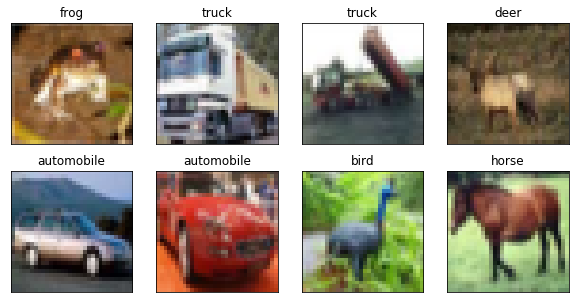

In [2]:
(X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) = cifar10_VGG.datasets.cifar10.load_data()

show_images(X_train_origin, Y_train_origin, 8)

(X_train, Y_train), (X_test, Y_test) = (X_train_origin, Y_train_origin), (X_test_origin, Y_test_origin) 

Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [3]:
cifar_model = cifar10_VGG.CifarVGG(img_shape = X_train[0].shape, class_num = 10,
                                      do_batch_norm = True, do_drop = True)

모델 펼처보기

In [4]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 75s 2ms/step - loss: 2.1638 - acc: 0.2349 - val_loss: 2.0617 - val_acc: 0.2158

Epoch 00001: val_loss improved from inf to 2.06166, saving model to ./save_model/model/vgg_2019-05-02_05h00m20s/01-2.0617-0.2349.hd5
Epoch 2/2
40000/40000 [==============================] - 70s 2ms/step - loss: 1.7836 - acc: 0.3168 - val_loss: 1.5551 - val_acc: 0.3976

Epoch 00002: val_loss improved from 2.06166 to 1.55505, saving model to ./save_model/model/vgg_2019-05-02_05h00m20s/02-1.5551-0.3168.hd5
10000/10000 [==============================] - 3s 310us/step
Test Loss :  1.5739255933761596
Test Accuracy :  0.3814
Test Loss :  1.5739255933761596
Test Accuracy :  38.14 %
predict class :  [3 8 8]
actual class :  [3 8 8]


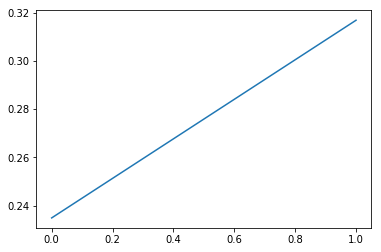

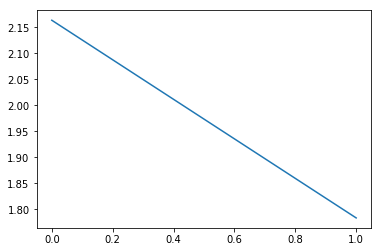

In [5]:
history_train = cifar_model.train(X_train, Y_train, 2, 32, 0.2)

#  model evaluate
result = cifar_model.show_eval(X_test, Y_test, 32)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))
print('actual class : ', np.where(Y_test[:3])[1])

In [6]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 8 8]


In [7]:
print('predict class : ',cifar_model.predict(X_test[:3]))

predict class :  [3 8 8]


In [8]:
prediction = cifar_model.predict(X_test)

In [9]:
print(Y_test_origin[:8])
print(prediction[:8])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]]
[3 8 8 8 4 3 1 4]


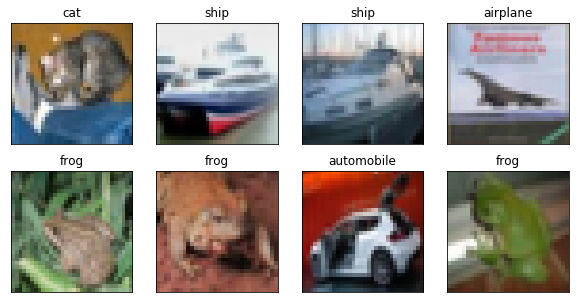

In [10]:
show_images(X_test_origin, Y_test_origin, 8)

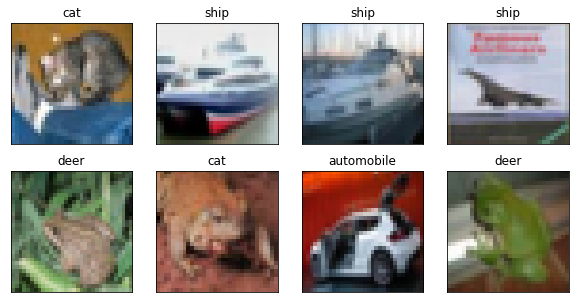

In [11]:
show_images(X_test_origin, prediction, 8)

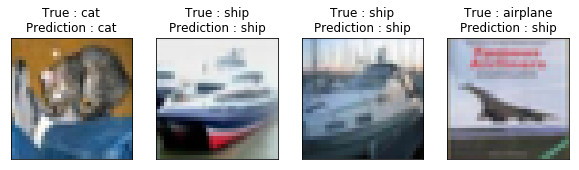

In [12]:
show_images_compare(X_test_origin, Y_test_origin, prediction)

In [13]:
result = cifar_model.show_eval(X_test, Y_test, 32)

10000/10000 [==============================] - 3s 307us/step
Test Loss :  1.5739255933761596
Test Accuracy :  0.3814


In [14]:
print('predict class : ',cifar_model.model.predict(X_test[:3]))

predict class :  [[2.0212706e-02 3.0432709e-03 6.8574533e-02 5.6118768e-01 3.9485220e-02
  1.4986183e-01 8.5766390e-02 5.8097549e-02 9.2730727e-03 4.4977418e-03]
 [1.8005584e-01 1.1753897e-01 4.0230379e-03 1.4558760e-03 9.9048298e-04
  1.2957001e-04 7.5897382e-04 1.8563084e-03 5.8841991e-01 1.0477103e-01]
 [1.6766593e-01 2.3641914e-01 7.3193279e-03 5.1856902e-03 3.8753261e-03
  8.5133163e-04 4.5324462e-03 7.9748128e-03 3.7433863e-01 1.9183736e-01]]


In [15]:
print('predict class : ',cifar_model.model.predict_classes(X_test[:3]))

predict class :  [3 8 8]


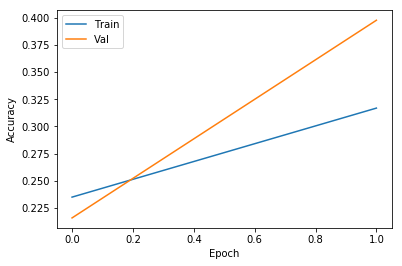

In [16]:
cifar10_VGG.plot_acc(history_train)

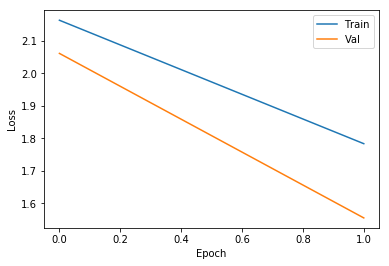

In [17]:
cifar10_VGG.plot_loss(history_train)

In [18]:
history_train.history['acc'][-1]

0.3168

In [19]:
prediction = cifar_model.model.predict(X_test)
Y_prediction = np.argmax(prediction, axis=1)

# label shape is digit
print(confusion_mat(Y_test_origin, Y_prediction))

[[532  56  34  86  19   0   2  40 188  43]
 [ 22 706   6  27   7   0   0  31  72 129]
 [125   5 117 285 243   1  59 129  16  20]
 [ 40   7  28 637  68   6  44 138   3  29]
 [ 45   4  51 169 346   2  69 297   7  10]
 [ 25   2  21 644  50  16  20 209   5   8]
 [ 10   0  47 314 378   0 151  83   4  13]
 [ 20   9  14 173  46   6   6 692   4  30]
 [311 100  28  58   4   0   2  14 454  29]
 [ 24 594   9  46   7   0   5  81  71 163]]


In [20]:
print(confusion_report(Y_test_origin, Y_prediction))

              precision    recall  f1-score   support

           0       0.46      0.53      0.49      1000
           1       0.48      0.71      0.57      1000
           2       0.33      0.12      0.17      1000
           3       0.26      0.64      0.37      1000
           4       0.30      0.35      0.32      1000
           5       0.52      0.02      0.03      1000
           6       0.42      0.15      0.22      1000
           7       0.40      0.69      0.51      1000
           8       0.55      0.45      0.50      1000
           9       0.34      0.16      0.22      1000

   micro avg       0.38      0.38      0.38     10000
   macro avg       0.41      0.38      0.34     10000
weighted avg       0.41      0.38      0.34     10000



In [21]:
np.unique(Y_test_origin)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
cifar_model.model.pop()

In [24]:
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [25]:
cifar_model.model.pop()
cifar_model.show_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

/home/masteryang/.conda/envs/tensorflow35/lib/python3.5/site-packages/keras/engine/training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
